In [1]:
import mne
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
elec_pos = pd.read_csv('~/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P076/sub-P076_space-native_SEEGA.tsv', sep='\t')

In [3]:
elec_pos.head()

,type,label,x,y,z,orig_group,new_label,new_group
0,SEEGA,LACg1,-5.680,62.715,19.892,LACg,LACg1,LACg
1,SEEGA,LACg2,-10.684,63.100,19.846,LACg,LACg2,LACg
2,SEEGA,LACg3,-15.313,63.549,19.846,LACg,LACg3,LACg
3,SEEGA,LACg4,-20.321,63.567,19.207,LACg,LACg4,LACg
4,SEEGA,LACg5,-25.330,63.843,19.207,LACg,LACg5,LACg


In [4]:
pattern = r'([A-Z]+)(\d+)'
match = re.match(pattern, 'LACg1', re.IGNORECASE)
print(match.group(0))
print(match.group(1))
print(match.group(2))

LACg1
LACg
1


In [5]:
channels = dict((label,[]) for label in elec_pos.new_group.unique())

In [6]:
pattern = r'([A-Z]+)(\d+)'
for id,electrode in enumerate(elec_pos.new_label.values):
    match = re.match(pattern, electrode, re.IGNORECASE)
    channels[match.group(1)].append(match.group(2))

In [7]:
channels

{'LACg': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LAHc': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LAIn': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LAm': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LFrO': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LOF': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'LPHc': ['1', '2', '3', '4', '5', '6', '7', '8'],
 'LPIn': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'RPHc': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']}

In [8]:
bipolar_chn = dict((label,[]) for label in elec_pos.new_group.unique())
for key in  channels.keys():
    for id in range(len(channels[key])-1):
        bipolar_chn[key].append((channels[key][id], channels[key][id+1]))

# Create new tsv

In [36]:
bipolar_elec = pd.DataFrame(columns=np.concatenate((elec_pos.columns[0:5],['group'])))
for key in  channels.keys():
    for id in range(len(channels[key])-1):
        chn1 = key+channels[key][id]
        chn2 = key+channels[key][id+1]
        # print(chn1)
        inf_chn1 = elec_pos.loc[elec_pos.new_label == chn1]
        inf_chn2 = elec_pos.loc[elec_pos.new_label == chn2]
        data = {
            'type': inf_chn1.type.values[0],
            'group': inf_chn1.new_group.values[0],
            'label': key+channels[key][id]+'-'+channels[key][id+1],
            'x': (inf_chn1.x.values[0] + inf_chn2.x.values[0])/2,
            'y': (inf_chn1.y.values[0] + inf_chn2.y.values[0])/2,
            'z': (inf_chn1.z.values[0] + inf_chn2.z.values[0])/2
        }
        data = pd.DataFrame([data])
        bipolar_elec = pd.concat([bipolar_elec, data], ignore_index=True)

In [37]:
bipolar_elec.head()

,type,label,x,y,z,group
0,SEEGA,LACg1-2,-8.1820,62.9075,19.8690,LACg
1,SEEGA,LACg2-3,-12.9985,63.3245,19.8460,LACg
2,SEEGA,LACg3-4,-17.8170,63.5580,19.5265,LACg
3,SEEGA,LACg4-5,-22.8255,63.7050,19.2070,LACg
4,SEEGA,LACg5-6,-27.7565,63.9465,19.0945,LACg


In [38]:
bipolar_elec.label.values

array(['LACg1-2', 'LACg2-3', 'LACg3-4', 'LACg4-5', 'LACg5-6', 'LACg6-7',
       'LACg7-8', 'LACg8-9', 'LACg9-10', 'LAHc1-2', 'LAHc2-3', 'LAHc3-4',
       'LAHc4-5', 'LAHc5-6', 'LAHc6-7', 'LAHc7-8', 'LAHc8-9', 'LAHc9-10',
       'LAIn1-2', 'LAIn2-3', 'LAIn3-4', 'LAIn4-5', 'LAIn5-6', 'LAIn6-7',
       'LAIn7-8', 'LAIn8-9', 'LAIn9-10', 'LAm1-2', 'LAm2-3', 'LAm3-4',
       'LAm4-5', 'LAm5-6', 'LAm6-7', 'LAm7-8', 'LAm8-9', 'LAm9-10',
       'LFrO1-2', 'LFrO2-3', 'LFrO3-4', 'LFrO4-5', 'LFrO5-6', 'LFrO6-7',
       'LFrO7-8', 'LFrO8-9', 'LFrO9-10', 'LOF1-2', 'LOF2-3', 'LOF3-4',
       'LOF4-5', 'LOF5-6', 'LOF6-7', 'LOF7-8', 'LOF8-9', 'LOF9-10',
       'LPHc1-2', 'LPHc2-3', 'LPHc3-4', 'LPHc4-5', 'LPHc5-6', 'LPHc6-7',
       'LPHc7-8', 'LPIn1-2', 'LPIn2-3', 'LPIn3-4', 'LPIn4-5', 'LPIn5-6',
       'LPIn6-7', 'LPIn7-8', 'LPIn8-9', 'LPIn9-10', 'RPHc1-2', 'RPHc2-3',
       'RPHc3-4', 'RPHc4-5', 'RPHc5-6', 'RPHc6-7', 'RPHc7-8', 'RPHc8-9',
       'RPHc9-10'], dtype=object)

# Plot

In [48]:
def readRegMatrix(trsfPath):
	with open(trsfPath) as (f):
		return np.loadtxt(f.readlines())

In [107]:

def imshow_mri(data, img, vox, suptitle, cmap='gray', vmin=None, vmax=None):
    """Show an MRI slice with a voxel annotated."""
    i, j, k = vox
    fig, ax = plt.subplots(figsize=(20,20))
    codes = nb.orientations.aff2axcodes(img.affine)
    # Figure out the title based on the code of this axis
    ori_slice = dict(P='Coronal', A='Coronal',
                     I='Axial', S='Axial',
                     L='Sagittal', R='Saggital')
    ori_names = dict(P='posterior', A='anterior',
                     I='inferior', S='superior',
                     L='left', R='right')
    title = ori_slice[codes[0]]
    scale = np.max(data.shape[2]/data.shape[1])
    ax.imshow(data[i], cmap=cmap, origin='lower', aspect=1, vmin=vmin, vmax=vmax)
    # reorient view so that RAS is always rightward and upward
    x_order = -1 if codes[2] in 'LIP' else 1
    y_order = -1 if codes[1] in 'LIP' else 1
    ax.set(xlim=[0, data.shape[2] - 1][::x_order],
           ylim=[0, data.shape[1] - 1][::y_order],
           xlabel=f'k ({ori_names[codes[2]]}+)',
           ylabel=f'j ({ori_names[codes[1]]}+)',
           title=f'{title} view: i={i} ({ori_names[codes[0]]}+)')
    fig.suptitle(suptitle)
    fig.subplots_adjust(0.1, 0.1, 0.95, 0.85)
    return fig

In [91]:
# Load reference MRI (orig.mgz) /home/mcespedes/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P076/mri/
t1_obj = nb.load('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P076/mri/orig.mgz')
Torig = t1_obj.header.get_vox2ras_tkr()
fs_transform = np.dot(t1_obj.affine, np.linalg.inv(Torig)) # To go from fs ras to mri ras

In [92]:
data = np.asarray(t1_obj.dataobj)
data.shape

(256, 256, 256)

In [110]:
mri_ras_mm1 = elec_pos.loc[elec_pos.new_label=='LAHc7', ['x', 'y', 'z']].to_numpy()[0]
mri_ras_mm2 = elec_pos.loc[elec_pos.new_label=='LAHc8', ['x', 'y', 'z']].to_numpy()[0]
mri_ras_mm_mid = bipolar_elec.loc[bipolar_elec.label=='LAHc7-8', ['x', 'y', 'z']].to_numpy()[0]
print(mri_ras_mm1) # Electrode position in contrast space!!
print(mri_ras_mm2)
print(mri_ras_mm_mid)

[-48.369  25.969  -4.013]
[-52.203  26.476  -4.531]
[-50.286   26.2225  -4.272 ]


In [111]:
# The transform file goes from contrast to non-contrast. The tfm, when loaded in slicer actually goes
# from non-contrast to contrast but the txt is inversed!
t1_transform=readRegMatrix('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P076/sub-P076_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt')
# Transform from contrast mri ras to non-contrast MRI ras
mri_ras_mm1 = mne.transforms.apply_trans(t1_transform, mri_ras_mm1)
mri_ras_mm2 = mne.transforms.apply_trans(t1_transform, mri_ras_mm2)
mri_ras_mm_mid = mne.transforms.apply_trans(t1_transform, mri_ras_mm_mid)

In [112]:
inv_affine = np.linalg.inv(t1_obj.affine)
# here's where the interpolation should be performed!!
vox1 = np.round(mne.transforms.apply_trans(inv_affine, mri_ras_mm1)).astype(int)
vox2 = np.round(mne.transforms.apply_trans(inv_affine, mri_ras_mm2)).astype(int)
voxmid = np.round(mne.transforms.apply_trans(inv_affine, mri_ras_mm_mid)).astype(int)

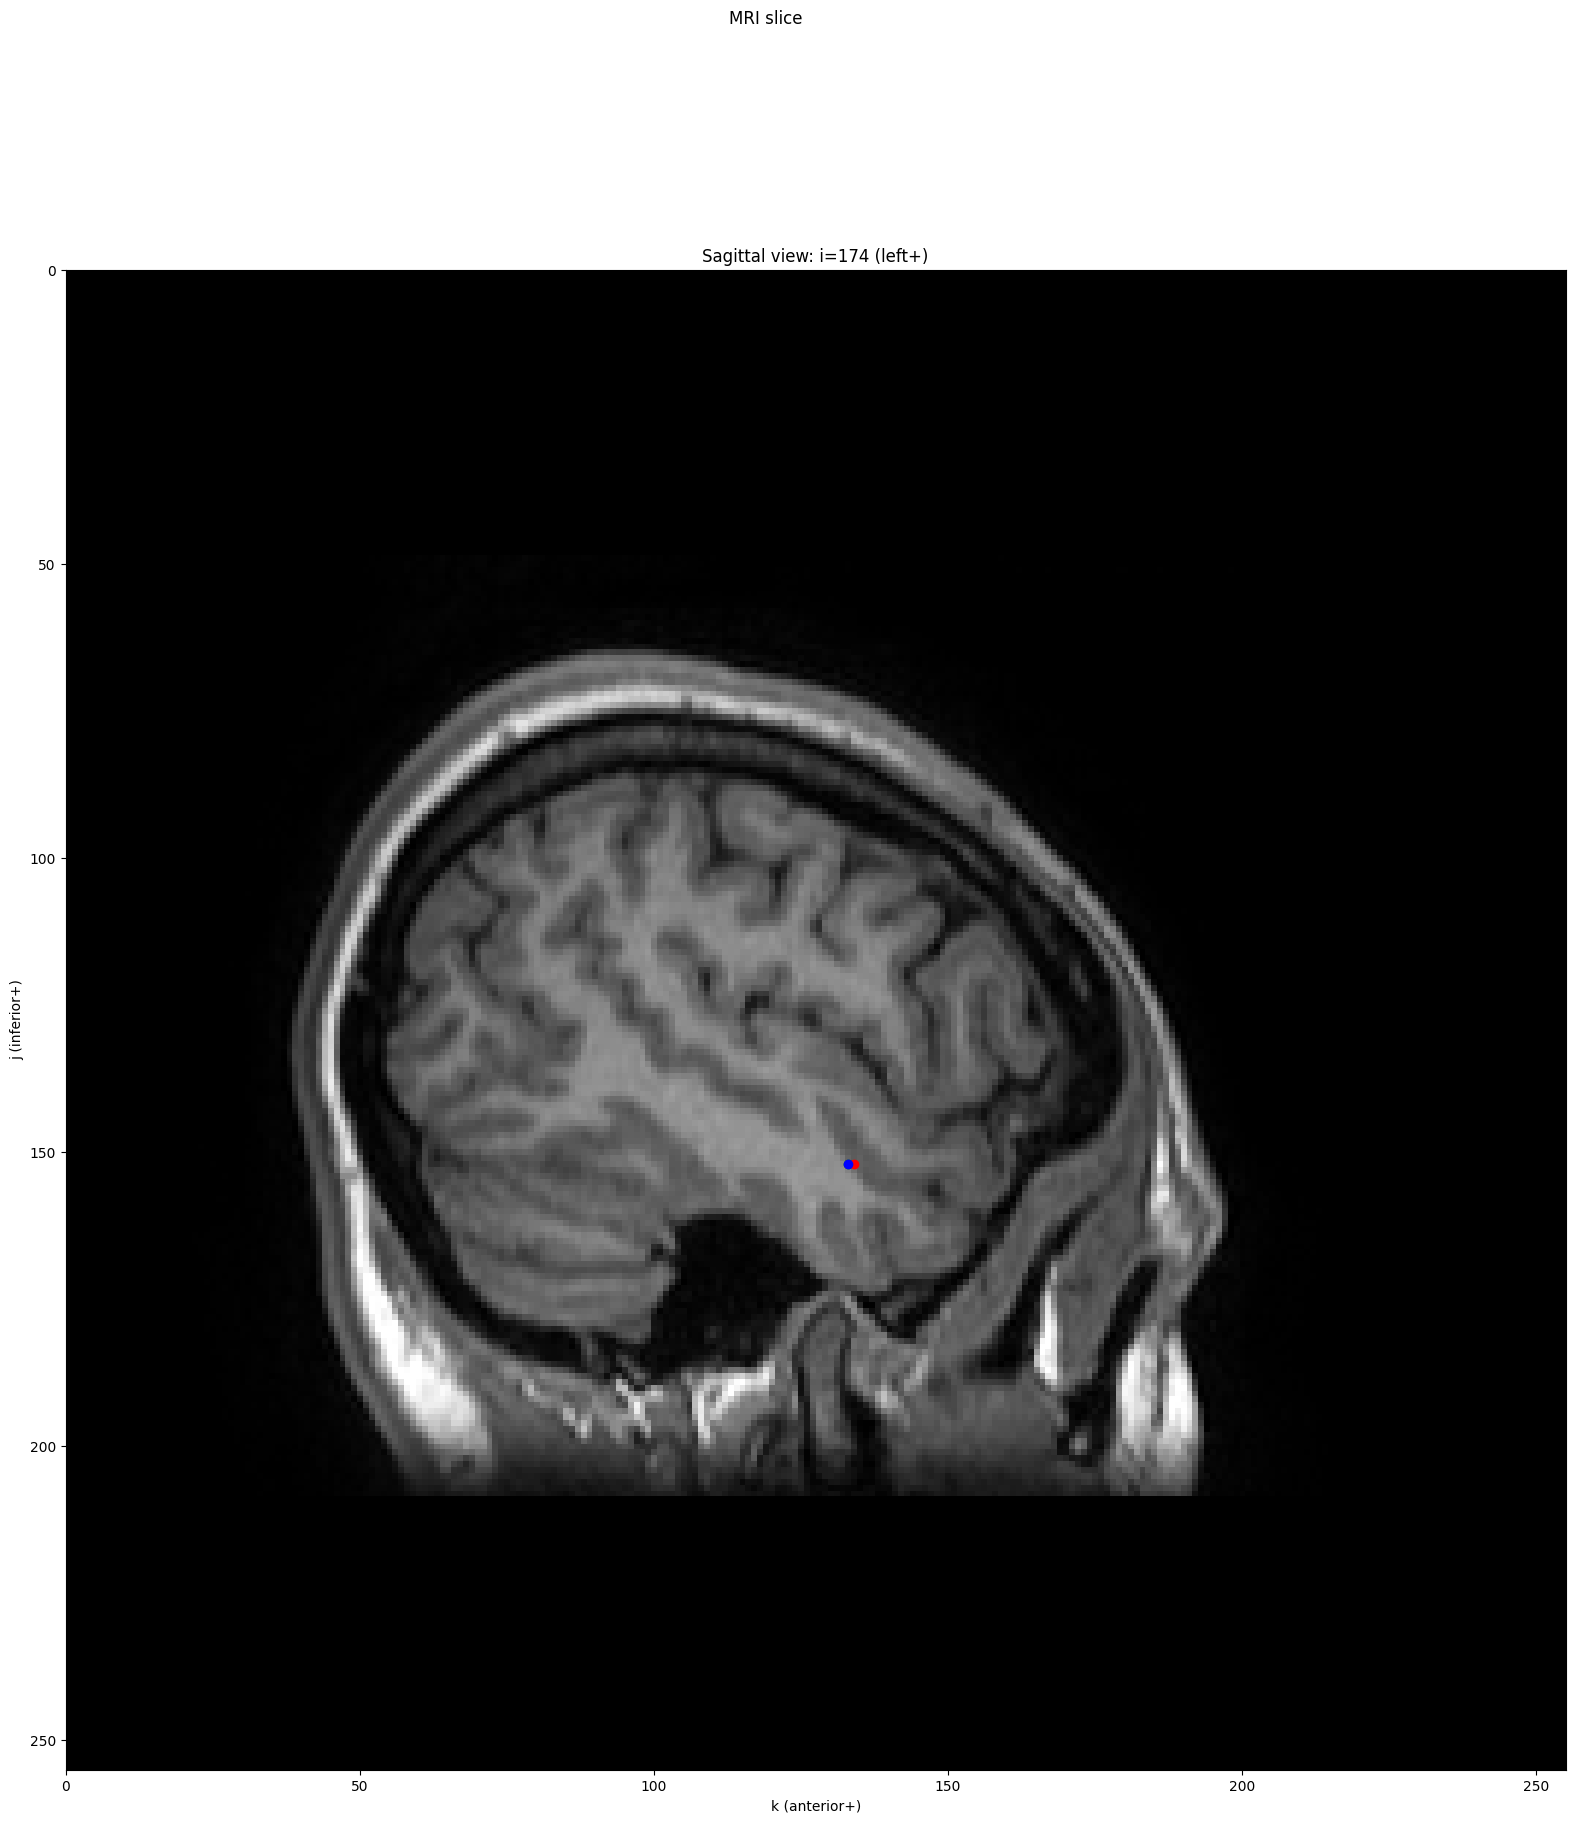

In [113]:
fig = imshow_mri(data, t1_obj, vox1, 'MRI slice')
fig.axes[0].scatter(vox1[2], vox1[1], color='g')
fig.axes[0].scatter(vox2[2], vox2[1], color='r')
fig.axes[0].scatter(voxmid[2], voxmid[1], color='b')

# Find labels

In [40]:
def get_colors_labels():
    with open('/home/mcesped/scratch/HippiEEGAtlas/FreeSurferColorLUT.txt', 'r') as f:
        raw_lut = f.readlines()

    # read and process line by line
    label_map = pd.DataFrame(columns=['Label', 'R', 'G', 'B'])
    for line in raw_lut:
        # Remove empty spaces
        line = line.strip()
        if not (line.startswith('#') or not line):
            s = line.split()
            # info = list(filter(None, info))
            id = int(s[0])
            info_s = {
                'Label': s[1],
                'R': int(s[2]),
                'G': int(s[3]),
                'B': int(s[4])
            }
            # info_s['A'] = 0 if (info_s['R']==0 & info_s['G']==0 & info_s['B']==0) else 255
            info_s = pd.DataFrame(info_s, index=[id])
            label_map = pd.concat([label_map,info_s], axis=0)
        label_map[['R','G','B']] = label_map[['R','G','B']].astype('int64')
    return label_map

In [70]:
def ras2vox(parc, elec_df, non_cont_to_cont_tf):
    # Useful transforms
    Torig_parc = parc.header.get_vox2ras_tkr()
    fs_transform_parc = np.dot(parc.affine, np.linalg.inv(Torig_parc)) # To go from fs ras to mri ras
    # Load data of parcellations
    data_parc = np.asarray(parc.dataobj)
    # Coordinates in MRI RAS
    mri_ras_mm = bipolar_elec[['x','y','z']].values
    # Transform from contrast mri ras to non-contrast MRI ras
    mri_ras_mm = mne.transforms.apply_trans(t1_transform, mri_ras_mm)
    # To voxels
    inv_affine = np.linalg.inv(parc_obj.affine)
    # here's where the interpolation should be performed!!
    vox = np.round(mne.transforms.apply_trans(inv_affine, mri_ras_mm)).astype(int)
    return vox, data_parc

In [80]:
def get_label_rgb(parc, elec_df, non_cont_to_cont_tf, label_map):
    vox, data_parc = ras2vox(parc, elec_df, non_cont_to_cont_tf)
    id = data_parc[vox[:,0], vox[:,1], vox[:,2]]
    vals = label_map.loc[id, ['Label','R', 'G', 'B']].to_numpy()
    vals = np.c_[id,vals]
    vals = pd.DataFrame(data=vals[:,1:], columns=['Label','R', 'G', 'B'], index=vals[:,0])
    return vals

In [43]:
# Load labels from LUT file
labels = get_colors_labels()

In [44]:
labels.head()

,Label,R,G,B
0,Unknown,0,0,0
1,Left-Cerebral-Exterior,70,130,180
2,Left-Cerebral-White-Matter,245,245,245
3,Left-Cerebral-Cortex,205,62,78
4,Left-Lateral-Ventricle,120,18,134


In [45]:
# Load parcellation file
parc_obj = nb.load('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P076/mri/aparc+aseg.orig.mgz')

In [46]:
data_parc = np.asarray(parc_obj.dataobj)
data_parc.shape

(256, 256, 256)

In [49]:
# The transform file goes from contrast to non-contrast. The tfm, when loaded in slicer actually goes
# from non-contrast to contrast but the txt is inversed!
t1_transform=readRegMatrix('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P076/sub-P076_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt')


In [81]:
caca = get_label_rgb(parc_obj, bipolar_elec, t1_transform, labels)

In [82]:
caca

,Label,R,G,B
1026,ctx-lh-rostralanteriorcingulate,80,20,140
2,Left-Cerebral-White-Matter,245,245,245
2,Left-Cerebral-White-Matter,245,245,245
2,Left-Cerebral-White-Matter,245,245,245
2,Left-Cerebral-White-Matter,245,245,245
...,...,...,...,...
41,Right-Cerebral-White-Matter,245,245,245
41,Right-Cerebral-White-Matter,245,245,245
41,Right-Cerebral-White-Matter,245,245,245
41,Right-Cerebral-White-Matter,245,245,245
